In [47]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt

In [48]:
img=cv2.imread('/kaggle/input/image/image.jpg')

In [49]:
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 252, 255],
        [255, 254, 255],
        [255, 255, 251],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [62]:
import cv2
import numpy as np

img = cv2.cvtColor(cv2.imread('/kaggle/input/image/image.jpg'), cv2.COLOR_BGR2RGB)

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [63]:
gray = get_grayscale(img)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)
eroded=erode(gray)
dilated=dilate(gray)

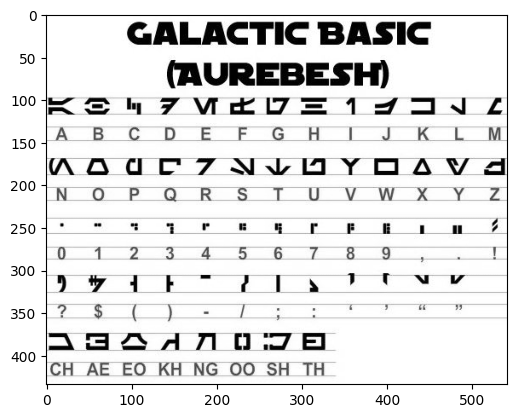

In [52]:
plt.imshow(gray,cmap='gray')

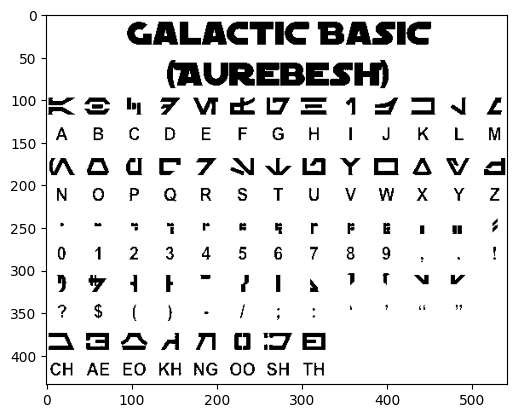

In [53]:
plt.imshow(thresh,cmap='gray')

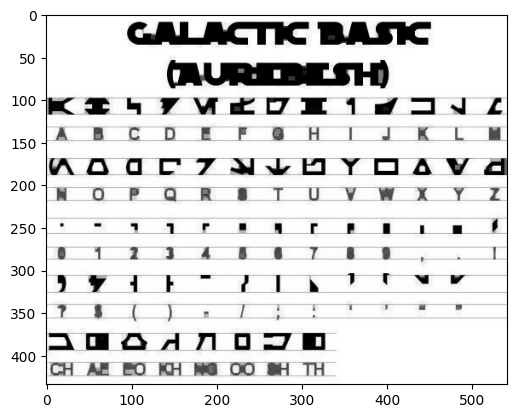

In [54]:
plt.imshow(opening,cmap='gray')

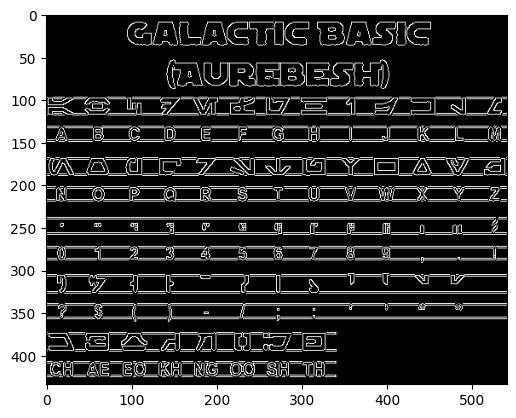

In [55]:
plt.imshow(canny,cmap='gray')

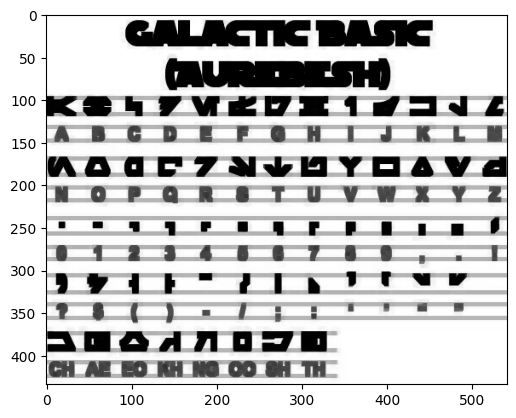

In [60]:
plt.imshow(eroded,cmap='gray')

In [59]:
print(type(erode))
print(erode.dtype)
print(erode.shape)


<class 'function'>


AttributeError: 'function' object has no attribute 'dtype'

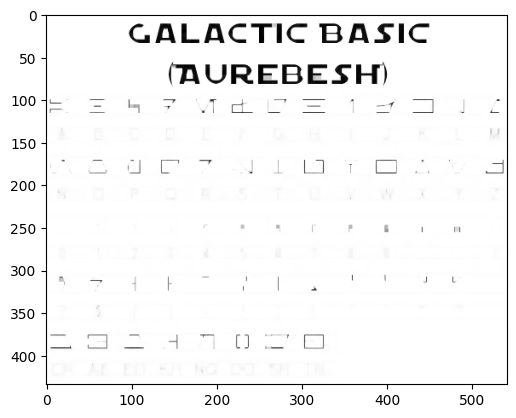

In [64]:
plt.imshow(dilated, cmap='gray')